# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [9]:
#!pip install fast_ml


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from joblib import dump
from sklearn.metrics import plot_confusion_matrix

from fast_ml.model_development import train_valid_test_split


In [11]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


#### Промежуточный вывод
Данные предобработаны в прошлом проекте (в теме «Статистический анализ данных»), пропусков нет, типы значений правильные.
Целевым показателем является столбец "is_ultra" со значениями 1 (тариф "Ультра") и 0 (не тариф "Ультра", то есть "Смарт"), именно его значения будут предсказывать модели. То есть будет решаться задача бинарной классификации.


## Разбейте данные на выборки

In [26]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'is_ultra', 
                                                                            train_size=0.6, valid_size=0.2, test_size=0.2, random_state=12345)

In [27]:
# убедимся, что размеры поделенных выборок соответствуют соотношению 3:1:1
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(1928, 4)
(643, 4)
(643, 4)


## Исследуйте модели

In [28]:
# модель для дерева решений с глубиной в 6 ветвей
model_tree_train = DecisionTreeClassifier(max_depth=6, random_state=12345)
model_tree_train.fit(X_train, y_train)

predictions_tree_valid = model_tree_train.predict(X_valid)
tree_accuracy = accuracy_score(y_valid, predictions_tree_valid)

In [29]:
# модель для случайного леса с 50 деревьями и глубиной в 20 ветвей
model_forest_train = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=12345)
model_forest_train.fit(X_train, y_train)

predictions_forest_valid = model_forest_train.predict(X_valid)
forest_accuracy = accuracy_score(y_valid, predictions_forest_valid)

In [30]:
# модель логистической регрессии с 100 итераций
model_lr_train = LogisticRegression(max_iter=100, solver='lbfgs', random_state=12345)
model_lr_train.fit(X_train, y_train)

predictions_lr_valid = model_lr_train.predict(X_valid)
lr_accuracy = accuracy_score(y_valid, predictions_lr_valid)

In [31]:
# модель логистической регрессии с 50 итераций
model_lr50_train = LogisticRegression(max_iter=50, solver='lbfgs', random_state=12345)
model_lr50_train.fit(X_train, y_train)

predictions_lr50_valid = model_lr_train.predict(X_valid)
lr50_accuracy = accuracy_score(y_valid, predictions_lr50_valid)

In [32]:
# модель логистической регрессии с 5000 итераций
model_lr5000_train = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=12345)
model_lr5000_train.fit(X_train, y_train)

predictions_lr5000_valid = model_lr_train.predict(X_valid)
lr5000_accuracy = accuracy_score(y_valid, predictions_lr5000_valid)

In [33]:
# создаем функцию счетчика ошибок в предсказанных моделях
def error_count(answers, predictions):
    counter = 0
    for i in range(len(answers)):
        if answers[i] != predictions[i]:
            counter += 1
    return counter

print('Ошибки сформированной модели дерева решений:', error_count(y_valid.values, predictions_tree_valid))
print('Ошибки сформированной модели случайного леса:', error_count(y_valid.values, predictions_forest_valid))
print('Ошибки сформированной модели логистической регрессии:', error_count(y_valid.values, predictions_lr_valid))
print('Ошибки сформированной модели логистической регрессии:', error_count(y_valid.values, predictions_lr50_valid))
print('Ошибки сформированной модели логистической регрессии:', error_count(y_valid.values, predictions_lr5000_valid))


print("Accuracy DecisionTreeClassifier:", tree_accuracy)
print("Accuracy RandomForestClassifier:", forest_accuracy)
print("Accuracy LogisticRegression:", lr_accuracy)
print("Accuracy LogisticRegression(50):", lr50_accuracy)
print("Accuracy LogisticRegression(5000):", lr5000_accuracy)

Ошибки сформированной модели дерева решений: 139
Ошибки сформированной модели случайного леса: 138
Ошибки сформированной модели логистической регрессии: 186
Ошибки сформированной модели логистической регрессии: 186
Ошибки сформированной модели логистической регрессии: 186
Accuracy DecisionTreeClassifier: 0.7838258164852255
Accuracy RandomForestClassifier: 0.7853810264385692
Accuracy LogisticRegression: 0.7107309486780715
Accuracy LogisticRegression(50): 0.7107309486780715
Accuracy LogisticRegression(5000): 0.7107309486780715


#### Выводы по исследованию трёх разных моделей.
Две модели из трёх (дерево решений и случайный лес) показали схожие результаты, превосходящие показатели исходной модели: количество ошибок ниже (138 и 139 против 186), доля правильных ответов, соответственно, выше (0.78 против 0.71). Третья модель (логистическая регрессия) оказалась менее эффективной, причем в ходе исследования я подставлял разные гиперпараметры, но при 3 разных количествах итераций (100, 50, 5000) показатели не меняются.

## Проверьте модель на тестовой выборке

In [34]:
# проверим лучшую модель на тестовой выборке

predictions_forest_test = model_forest_train.predict(X_test)
forest_test_accuracy = accuracy_score(y_test, predictions_forest_test)

print("Accuracy TEST RandomForestClassifier:", forest_test_accuracy)

Accuracy TEST RandomForestClassifier: 0.7838258164852255


#### Выводы по проверке моделей на тестовой выборке.
Результаты исследований подтверждаются: модель RandomForestClassifier показала на тестовой выборке еще более высокий результат accuracy, чем на учебной/валидационной.

## (дополнительно) Проверьте модели на адекватность

Построим константную модель: теоретическую модель, которая каждой строке присваивает один и тот же класс, в нашем случае наиболее встречаемый (strategy='most_frequent'). 

In [35]:
from sklearn.dummy import DummyClassifier
dummy_clsf = DummyClassifier(strategy='most_frequent')
dummy_clsf.fit(X_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clsf.predict(X_test)
score_dummy = dummy_clsf.score(X_test, y_test)
print("Dummy accuracy: ", score_dummy)

Dummy accuracy:  0.6842923794712286


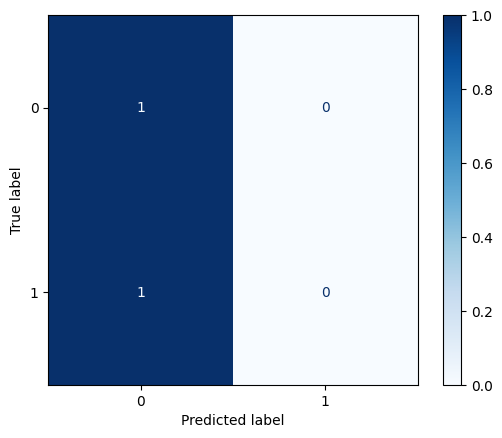

In [36]:
plot_confusion_matrix(estimator=dummy_clsf, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues')

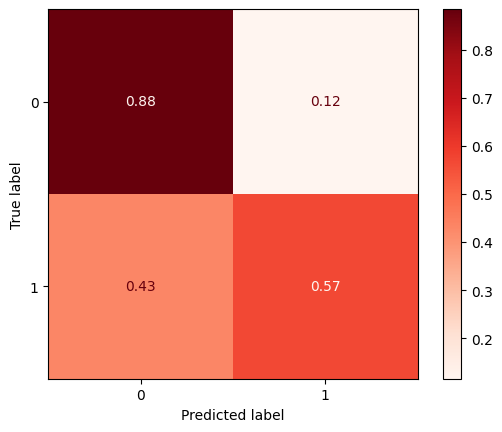

In [37]:
plot_confusion_matrix(estimator=model_forest_train, X=X_test, y_true=y_test,
                      normalize='true', cmap='Reds')

Проверка на адекватность пройдена: accuracy нашей модели — 78%, а у константной модели 68%. Матрица ошибок показывает, что наша модель очень хорошо определяет нули,  лишь в 57% случаев правильно ставит единицы. Есть над чем работать, но в цели данного проекта это не входит. 

### ВЫВОД

Анализ датасета и различных моделей машинного обучения помог нам подобрать эффективную модель для анализа поведения клиентов оператора мобильной связи "Мегалайн".
Было построео и обучено 5 моделей (дерево решений, три логистических регрессии и случайный лес)
 Лучшие результаты показала модель RandomForestClassifier. Модель также прошла проверку на адекватность. 

Благодаря проделанной работе «Мегалайн» сможет с точностью в 78% анализировать поведение клиентов и предлагать новый тариф - "Смарт" или "Ультра". 